In [11]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [81]:
time <- as.integer(160)

In [82]:
N_AGENTS <- 1134

In [14]:
N_AGENTS <- 12625

In [83]:
mypath <- "../../log/server/URV-contact-active-alpha0.1"

In [84]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [85]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [86]:
list.dirs(mypath)

[1] "2019_08_03_22_08_52" "2019_08_03_22_09_00" "2019_08_03_22_09_54"
   [4] "2019_08_03_22_10_04" "2019_08_03_22_10_53" "2019_08_03_22_11_05"
   [7] "2019_08_03_22_11_54" "2019_08_03_22_12_05" "2019_08_03_22_12_58"
  [10] "2019_08_03_22_13_06" "2019_08_03_22_14_01" "2019_08_03_22_14_09"
  [13] "2019_08_03_22_15_02" "2019_08_03_22_15_10" "2019_08_03_22_16_06"
  [16] "2019_08_03_22_16_13" "2019_08_03_22_17_10" "2019_08_03_22_17_16"
  [19] "2019_08_03_22_18_17" "2019_08_03_22_18_23" "2019_08_03_22_19_18"
  [22] "2019_08_03_22_19_23" "2019_08_03_22_20_21" "2019_08_03_22_20_28"
  [25] "2019_08_03_22_21_25" "2019_08_03_22_21_30" "2019_08_03_22_22_30"
  [28] "2019_08_03_22_22_32" "2019_08_03_22_23_30" "2019_08_03_22_23_33"
  [31] "2019_08_03_22_24_32" "2019_08_03_22_24_34" "2019_08_03_22_25_32"
  [34] "2019_08_03_22_25_36" "2019_08_03_22_26_34" "2019_08_03_22_26_37"
  [37] "2019_08_03_22_27_35" "2019_08_03_22_27_40" "2019_08_03_22_28_41"
  [40] "2019_08_03_22_28_45" "2019_08_03_22_29_43" "2019_08_03_22_29_49"
  [43] "2019_08_03_22_30_44" "2019_08_03_22_30_49" "2019_08_03_22_31_47"
  [46] "2019_08_03_22_31_51" "2019_08_03_22_32_51" "2019_08_03_22_32_55"
  [49] "2019_08_03_22_33_53" "2019_08_03_22_33_57" "2019_08_03_22_34_54"
  [52] "2019_08_03_22_34_59" "2019_08_03_22_35_58" "2019_08_03_22_36_03"
  [55] "2019_08_03_22_37_02" "2019_08_03_22_37_07" "2019_08_03_22_38_00"
  [58] "2019_08_03_22_38_07" "2019_08_03_22_39_04" "2019_08_03_22_39_10"
  [61] "2019_08_03_22_40_08" "2019_08_03_22_40_13" "2019_08_03_22_41_11"
  [64] "2019_08_03_22_41_17" "2019_08_03_22_42_14" "2019_08_03_22_42_19"
  [67] "2019_08_03_22_43_20" "2019_08_03_22_43_23" "2019_08_03_22_44_24"
  [70] "2019_08_03_22_44_28" "2019_08_03_22_45_22" "2019_08_03_22_45_28"
  [73] "2019_08_03_22_46_24" "2019_08_03_22_46_30" "2019_08_03_22_47_29"
  [76] "2019_08_03_22_47_35" "2019_08_03_22_48_36" "2019_08_03_22_48_38"
  [79] "2019_08_03_22_49_39" "2019_08_03_22_49_42" "2019_08_03_22_50_41"
  [82] "2019_08_03_22_50_44" "2019_08_03_22_51_42" "2019_08_03_22_51_45"
  [85] "2019_08_03_22_52_42" "2019_08_03_22_52_44" "2019_08_03_22_53_46"
  [88] "2019_08_03_22_53_47" "2019_08_03_22_54_48" "2019_08_03_22_54_54"
  [91] "2019_08_03_22_55_51" "2019_08_03_22_55_57" "2019_08_03_22_56_52"
  [94] "2019_08_03_22_56_59" "2019_08_03_22_57_54" "2019_08_03_22_58_03"
  [97] "2019_08_03_22_58_55" "2019_08_03_22_59_04" "2019_08_03_22_59_53"
 [100] "2019_08_03_23_00_05" "2019_08_03_23_00_55" "2019_08_03_23_01_07"
 [103] "2019_08_03_23_02_01" "2019_08_03_23_02_22" "2019_08_03_23_03_02"
 [106] "2019_08_03_23_03_19" "2019_08_03_23_04_02" "2019_08_03_23_04_23"
 [109] "2019_08_03_23_05_03" "2019_08_03_23_05_21" "2019_08_03_23_06_03"
 [112] "2019_08_03_23_06_21" "2019_08_03_23_07_09" "2019_08_03_23_07_20"
 [115] "2019_08_03_23_08_14" "2019_08_03_23_08_21" "2019_08_03_23_09_16"
 [118] "2019_08_03_23_09_24" "2019_08_03_23_10_15" "2019_08_03_23_10_26"
 [121] "2019_08_03_23_11_16" "2019_08_03_23_11_27" "2019_08_03_23_12_19"
 [124] "2019_08_03_23_12_29" "2019_08_03_23_13_19" "2019_08_03_23_13_31"
 [127] "2019_08_03_23_14_20" "2019_08_03_23_14_35" "2019_08_03_23_15_23"
 [130] "2019_08_03_23_15_41" "2019_08_03_23_16_24" "2019_08_03_23_16_40"
 [133] "2019_08_03_23_17_23" "2019_08_03_23_17_42" "2019_08_03_23_18_22"
 [136] "2019_08_03_23_18_42" "2019_08_03_23_19_20" "2019_08_03_23_19_40"
 [139] "2019_08_03_23_20_21" "2019_08_03_23_20_39" "2019_08_03_23_21_19"
 [142] "2019_08_03_23_21_40" "2019_08_03_23_22_18" "2019_08_03_23_22_38"
 [145] "2019_08_03_23_23_17" "2019_08_03_23_23_38" "2019_08_03_23_24_16"
 [148] "2019_08_03_23_24_38" "2019_08_03_23_25_15" "2019_08_03_23_25_37"
 [151] "2019_08_03_23_26_13" "2019_08_03_23_26_35" "2019_08_03_23_27_12"
 [154] "2019_08_03_23_27_34" "2019_08_03_23_28_11" "2019_08_03_23_28_33"
 [157] "2019_08_03_23_29_10" "2019_08_03_23_29_32" "2019_08_03_23_30_09"
 [160] "2019_08_03_23_30_33" "2019_08_03_23_31_08" "2019_08_03_23_31_33"
 [163] "2019_08_03_23_32_08" "2019_08_03_23_32_34" "2019_08_0

In [87]:
thepath = list.dirs(mypath)[1]

In [88]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [89]:
DF <- read.csv(file = filename, skip=12)

In [90]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [91]:
tempDF

time,agent,k.core,state,degree
1,0,0,i,0


In [92]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [93]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [94]:
DT <- data.table(DF)

In [95]:
DT1 = DT[, sum(density), by=list(time, state)]

In [96]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [97]:
DT1$density <- DT1$density / N_AGENTS

In [98]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [101]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 160]
density <- as.numeric(tempDT1[,'density'])

In [102]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [104]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 160]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_08_52/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_09_00/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_09_54/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_10_04/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_10_53/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_11_05/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_11_54/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_12_05/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_12_58/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_13_06/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_14_01/k_core.csv"
[1] "../../log/server/URV-contact-active-alpha0.1/2019_08_03_22_14_09/k_core.csv"
[1] "../../log/s

In [105]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [135]:
emptytable <- rawtable

In [136]:
emptytabletime <- emptytable[emptytable$time == 160]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.21]
emptytabletime <- emptytabletime[emptytabletime$density > 0.1]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 160][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 160][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [137]:
toplot[is.na(toplot)] <- 1e-4

In [138]:
toplot = toplot[order(toplot$k.core.init),]

In [139]:
typeof(toplot)

[1] "list"

In [140]:
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [127]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [128]:
toplot

k.core.init,mean,std
1,0.861196403273,0.08633895841285
2,0.859093067426,0.09324672665491
3,0.869105517254,0.01023898251352
4,0.868712947026,0.00975265062992
5,0.866366910093,0.05435497933600
6,0.867915414817,0.00976428186405
7,0.868004979770,0.01079358102009
8,0.869579897358,0.00994902308142
9,0.868768748398,0.01103274056493
10,0.868962671715,0.01040657303355


Plot

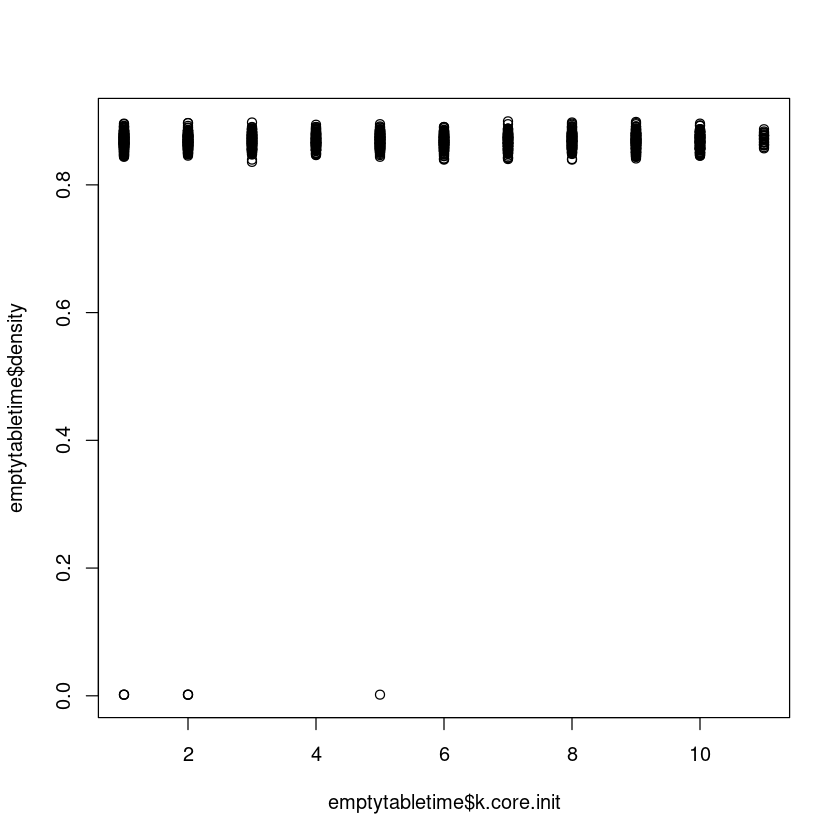

In [129]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [130]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
            Min              1Q          Median              3Q             Max 
-0.004675091761 -0.001388109691 -0.000003775434  0.000641953000  0.004469849287 

Coefficients:
                  Estimate     Std. Error   t value   Pr(>|t|)
(Intercept) 0.862033141627 0.001672338688 515.46565 < 2.22e-16
x           0.000867508780 0.000246572888   3.51827  0.0065332

Residual standard error: 0.00258607826 on 9 degrees of freedom
Multiple R-squared:  0.579010181,	Adjusted R-squared:  0.532233534 
F-statistic: 12.3781892 on 1 and 9 DF,  p-value: 0.00653322146


[1] 0.76092718485


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
            Min              1Q          Median              3Q             Max 
-0.004037691053 -0.001082490692 -0.000385114004  0.000950314296  0.004363615835 

Coefficients:
                   Estimate      Std. Error    t value Pr(>|t|)
(Intercept)  0.867238194307  0.000757591941 1144.72996  < 2e-16
poly(x, 2)1  0.009098508843  0.002512648213    3.62108 0.006772
poly(x, 2)2 -0.003111751697  0.002512648213   -1.23844 0.250661

Residual standard error: 0.00251264821 on 8 degrees of freedom
Multiple R-squared:  0.646736212,	Adjusted R-squared:  0.558420265 
F-statistic: 7.32298338 on 2 and 8 DF,  p-value: 0.0155738679


[1] 0.804199112127

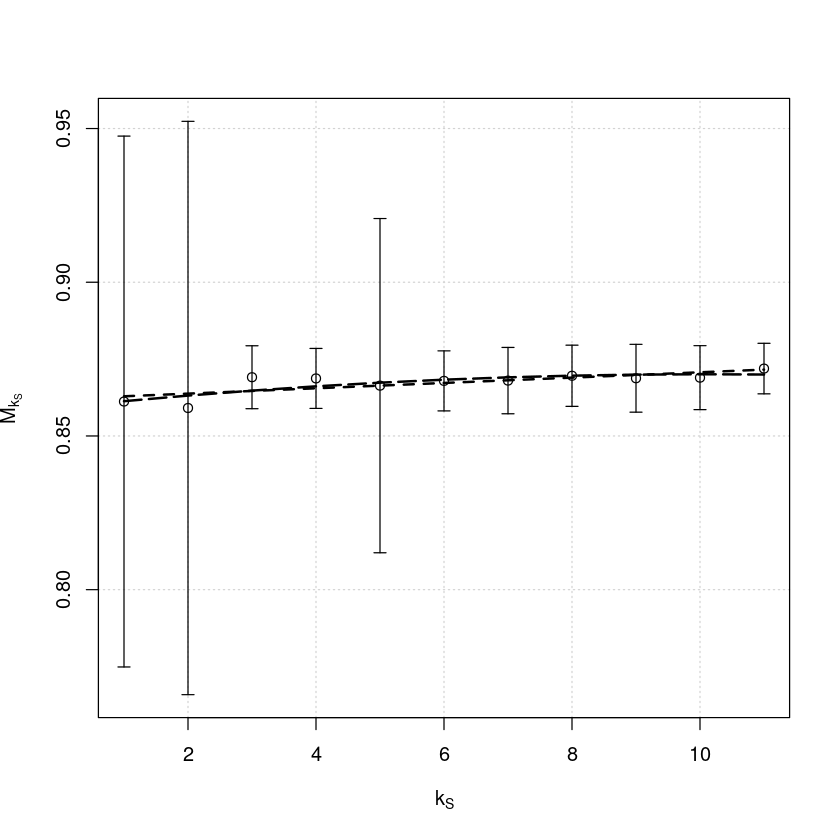

In [131]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 0.87028525246 0.00109403726 795.48045 < 2.22e-16
b 0.01283754300 0.00339433940   3.78204  0.0043354

Residual standard error: 0.00246369882 on 9 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 5.80902812e-07


[1] 0.786074366407


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
     Estimate  Std. Error t value Pr(>|t|)
b 0.613096180 0.597205208 1.02661   0.3288

Residual standard error: 0.128948378 on 10 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 9.73950802e-06


[1] 0.668395409227

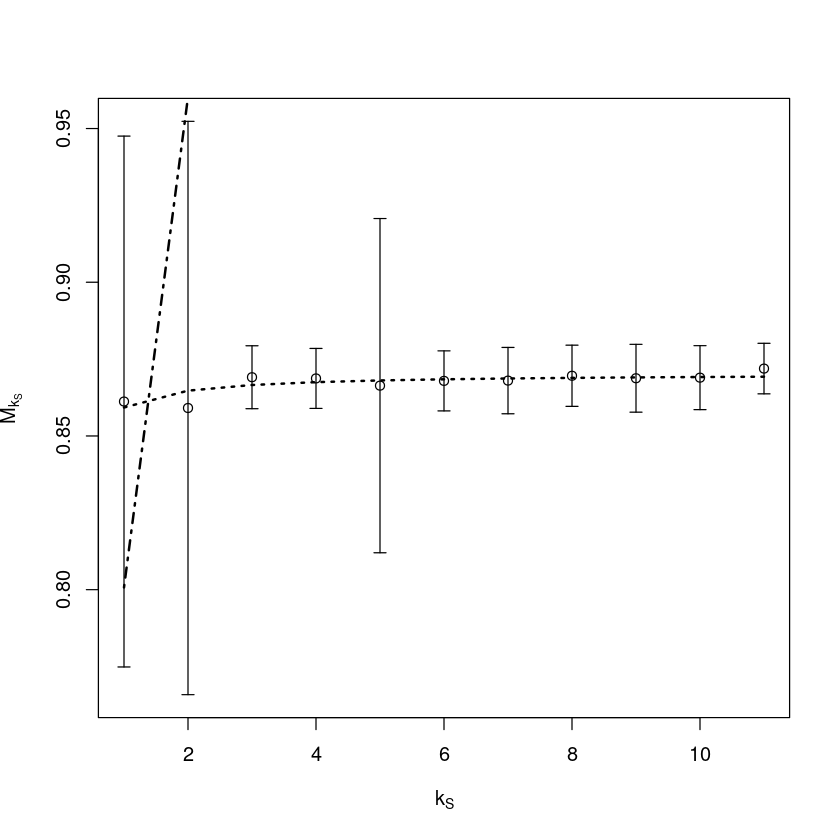

In [132]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=4,col="black",lwd=2)

In [133]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

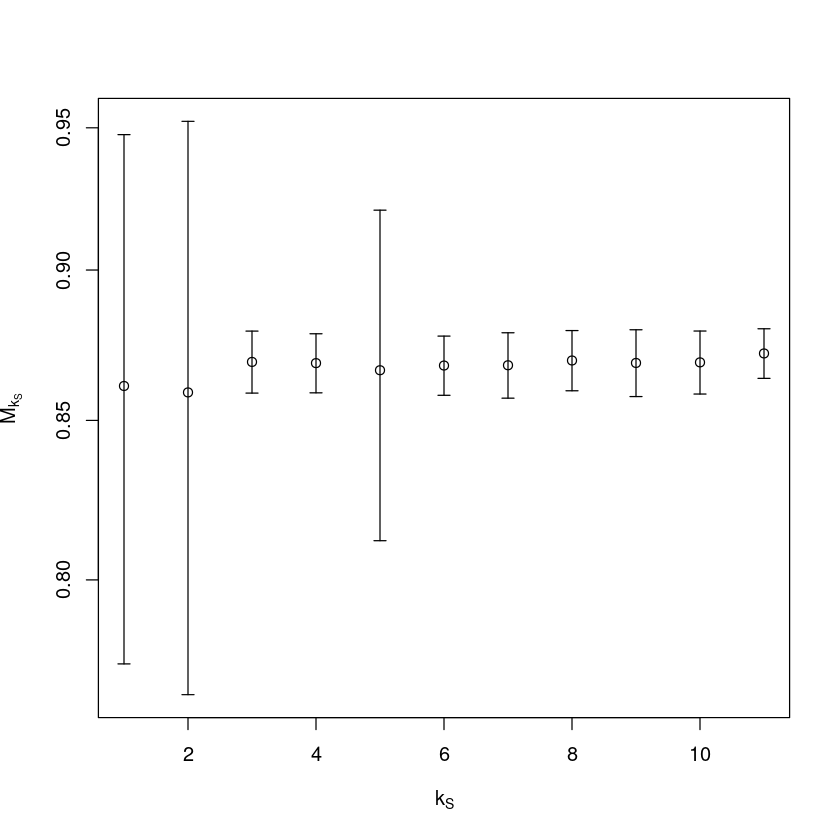

In [134]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [120]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2